In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# ET Analysis
## Initial data check
First import data and verify that it looks correct.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dt = pd.read_csv("samples_data_table.csv", low_memory=False)

In [4]:
# Show first couple rows to show this worked.
dt.head()

,field_id,crop,time,et_actual,et_forecast
0,CA_342669,36,2023-12-01,8.0,9.0
1,CA_342669,36,2023-11-01,11.0,7.0
2,CA_342669,36,2023-10-01,22.0,19.0
3,CA_342669,36,2023-09-01,28.0,42.0
4,CA_342669,36,2023-08-01,50.0,38.0


## Table Processing

I'll add a diff column in the table as an easy way to see how the forecast algorithm did against the real ET data.
This will be plotted later.

In [5]:
dt['diff'] = dt['et_forecast'] - dt['et_actual']

dt.head()

,field_id,crop,time,et_actual,et_forecast,diff
0,CA_342669,36,2023-12-01,8.0,9.0,1.0
1,CA_342669,36,2023-11-01,11.0,7.0,-4.0
2,CA_342669,36,2023-10-01,22.0,19.0,-3.0
3,CA_342669,36,2023-09-01,28.0,42.0,14.0
4,CA_342669,36,2023-08-01,50.0,38.0,-12.0


#### Missing Values
Checking to see if there were any missing values shows us that there is no missing data between all columns

In [6]:
dt.isna().sum()

field_id       0
crop           0
time           0
et_actual      0
et_forecast    0
diff           0
dtype: int64

## Field analysis
The table as it isn't much helpful. Best to group the table by fields

In [7]:
dt_fields = dt[['field_id', 'et_actual', 'et_forecast', 'diff']].groupby(['field_id'])

## Crop analysis

Another useful table would be grouping by crops.

In [8]:
dt_crops = dt[['crop', 'et_actual', 'et_forecast', 'diff']].groupby(['crop'])


Creating a table for crop averages tells us the average ET for each type of crop.

Since a diff column was added in the beginning, the table also shows the average difference in ET forecasting to its actual.

In [9]:
dt_crop_average = dt_crops[['et_actual', 'et_forecast', 'diff']].mean()

print(dt_crop_average)

      et_actual  et_forecast      diff
crop                                  
3     87.728070    80.697368 -7.030702
36    66.673913    65.420290 -1.253623
47    59.725962    57.211939 -2.514022
61    50.250000    46.808974 -3.441026
66    83.083333    79.533333 -3.550000
67    81.320513    81.826923  0.506410
69    50.046948    49.397887 -0.649061
72    69.023438    69.299479  0.276042
75    86.319940    87.339286  1.019345
76    73.720238    80.119048  6.398810
78    71.824074    65.916667 -5.907407
82    78.750000    81.833333  3.083333
122   43.208333    47.333333  4.125000
141   54.000000    61.716667  7.716667
152   30.666667    33.583333  2.916667
176   67.120748    68.841837  1.721088
204   77.354167    76.833333 -0.520833
211   65.965278    68.152778  2.187500
215   75.384615    73.185897 -2.198718
220   82.380952    83.309524  0.928571
241   83.825758    82.852273 -0.973485


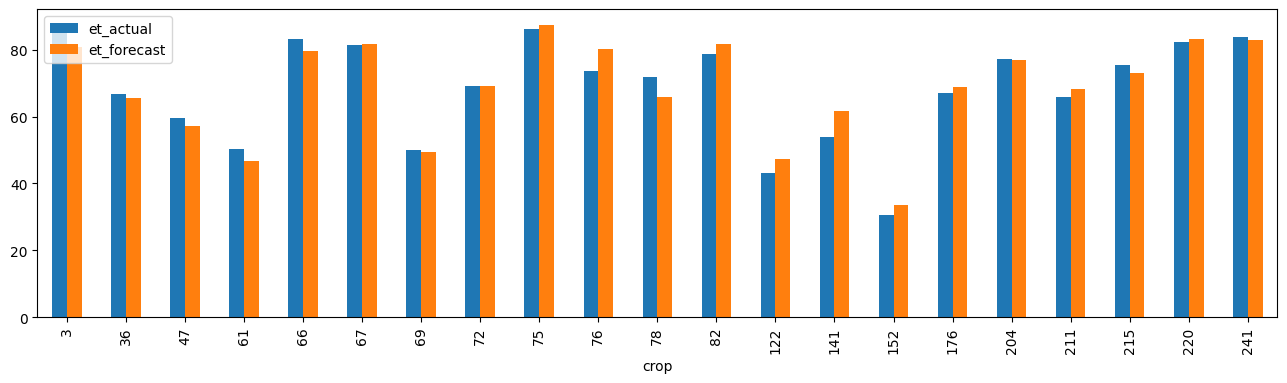

In [10]:
dt_crop_average[['et_actual', 'et_forecast']].plot.bar(figsize=(16, 4), legend="best");

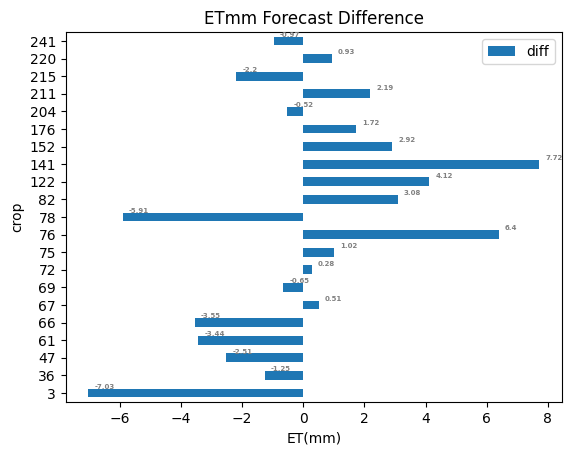

In [11]:
dtca_plot = dt_crop_average[['diff']].plot.barh(title="ETmm Forecast Difference", xlabel="ET(mm)");

for i in dtca_plot.patches:
    dtca_plot.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 5, fontweight ='bold',
             color ='grey')